In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('./data.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-24,18.480000,18.540001,18.080000,18.110001,17.876858,160700
1,2020-06-25,18.059999,18.059999,17.670000,18.020000,17.788017,127300
2,2020-06-26,17.799999,17.900000,17.430000,17.770000,17.541235,229100
3,2020-06-29,18.010000,18.450001,17.809999,18.250000,18.015057,140300
4,2020-06-30,18.090000,18.730000,17.969999,18.120001,17.886730,181500


# Preprocessing

In [4]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
len(data)

252

In [6]:
data = data.drop(['Date'],axis=1)

In [7]:
data

,Open,High,Low,Close,Adj Close,Volume
0,18.480000,18.540001,18.080000,18.110001,17.876858,160700
1,18.059999,18.059999,17.670000,18.020000,17.788017,127300
2,17.799999,17.900000,17.430000,17.770000,17.541235,229100
3,18.010000,18.450001,17.809999,18.250000,18.015057,140300
4,18.090000,18.730000,17.969999,18.120001,17.886730,181500
...,...,...,...,...,...,...
247,38.099998,38.410000,37.540001,37.680000,37.680000,68300
248,37.230000,37.250000,36.770000,37.000000,37.000000,139600
249,37.340000,37.480000,36.910000,37.400002,37.400002,77200
250,37.250000,37.570000,36.830002,36.889999,36.889999,110000


In [8]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,29.619127,30.026310,29.203135,29.617937,29.470533,99352.380952
std,6.833930,6.857797,6.776183,6.794789,6.860502,55321.397364
min,17.080000,17.570000,16.740000,17.110001,16.889732,28800.000000
25%,22.882500,23.170000,22.470000,23.045000,22.792637,65050.000000
50%,30.580000,30.825001,29.945000,30.500000,30.333924,86500.000000
75%,36.000000,36.352500,35.255000,35.982501,35.812212,116975.000000
max,39.580002,39.650002,38.580002,38.779999,38.779999,391600.000000


<AxesSubplot:>

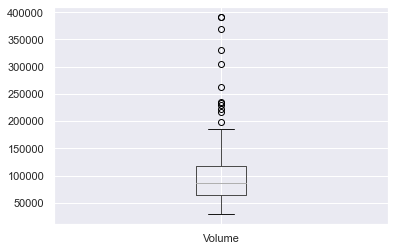

In [10]:
data.boxplot(column=['Volume'],return_type='axes')

The Volume colum has outliers
. So we need to filter our data to avoid them

In [11]:
filtered_data = data[data['Volume']<180000]

<AxesSubplot:>

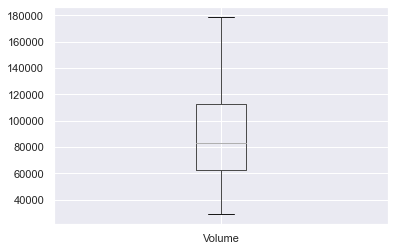

In [12]:
filtered_data.boxplot(column=['Volume'],return_type='axes')

<AxesSubplot:>

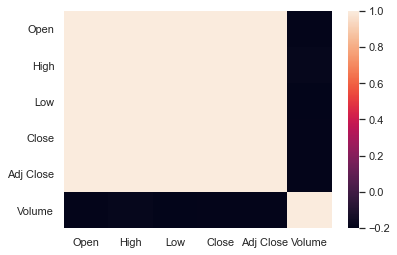

In [13]:
sns.heatmap(filtered_data.corr())

In [14]:
y = filtered_data['Close']
x = filtered_data.drop(['Close'],axis=1)

From the heatmap we can see attributes are highly correlated, we have to check for the multi-colinearity

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [16]:
VIF = pd.DataFrame()

In [17]:
VIF['Colums'] = x.columns 

In [18]:
VIF['vif'] = [vif(x.values,i) for i in range(len(x.columns))]

In [19]:
VIF

,Colums,vif
0,Open,14313.438070
1,High,21180.657763
2,Low,26992.620330
3,Adj Close,15685.541945
4,Volume,6.703484


In [20]:
x = x.drop(['Adj Close','Low','Volume','High'],axis=1)

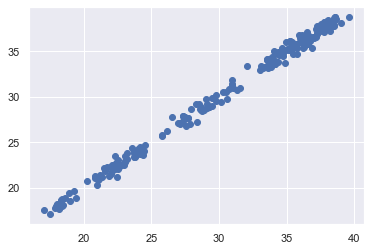

In [21]:
plt.scatter(x,y)

Removed the attributes with high vif values to avoid multicolianity and skewed model

# Model Training

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(x_train,y_train)

LinearRegression()

In [33]:
model.score(x_test,y_test)

0.9923996217000189